# Student Loan Risk with Deep Learning

In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [2]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [4]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [5]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"]

# Display a sample of y
y.head()

0    0
1    0
2    0
3    1
4    0
Name: credit_ranking, dtype: int64

In [6]:
# Define features set X by selecting all columns but credit_ranking

X = loans_df.drop('credit_ranking', axis=1)
# Review the features DataFrame
X.head()


,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [7]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [8]:
# Create a StandardScaler instance
scaler = StandardScaler().fit(X_train)



# Fit the scaler to the features training dataset
X_train_scaled = scaler.transform(X_train)

# Fit the scaler to the features training dataset
X_test_scaled = scaler.transform(X_test)

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [10]:
# Define the the number of inputs (features) to the model
input_nodes = len(X.columns)

# Review the number of features
print(input_nodes)


11


In [20]:
# Define the number of hidden nodes for the first hidden layer

hidden_layer1_units = 6

# Define the number of hidden nodes for the second hidden layer
hidden_layer2_units=3

# Define the number of neurons in the output layer
output_layer_unit=1

In [21]:
# Create the Sequential model instance
nn_model = tf.keras.models.Sequential()


#nn_model.add(tf.keras.layers.Dense(units=3, activation="relu"))


# Add the first hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_layer1_units, activation="relu", input_dim=len(X_train.columns)))

# Add the second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_layer2_units, activation="relu"))


# Add the output layer to the model specifying the number of output neurons and activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 72        
                                                                 
 dense_7 (Dense)             (None, 3)                 21        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Display the Sequential model summary
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [23]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [24]:
# Fit the model using 50 epochs and the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
38/38 [==============================] - 1s 6ms/step - loss: 0.6952 - accuracy: 0.4937
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.5588
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.5930
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.6022
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6080
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6138
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.6222
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.6355
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.6447
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.7023
Epoch 11/

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


13/13 - 0s - loss: 0.5220 - accuracy: 0.7400 - 417ms/epoch - 32ms/step
Loss: 0.5219627618789673, Accuracy: 0.7400000095367432


<Axes: >

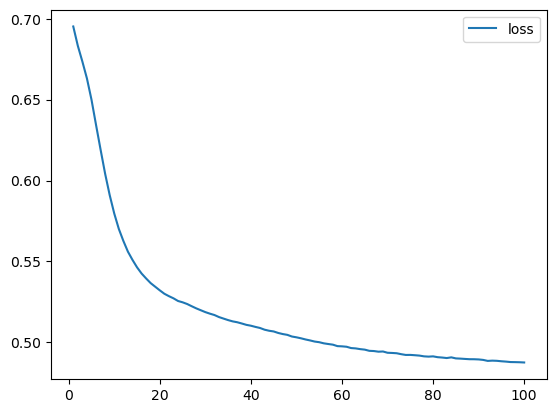

In [25]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Display the model loss and accuracy results
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")


<Axes: >

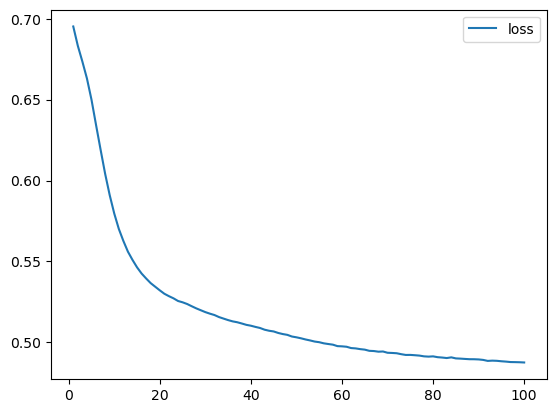

In [26]:
# Display the model loss and accuracy results
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")

<Axes: >

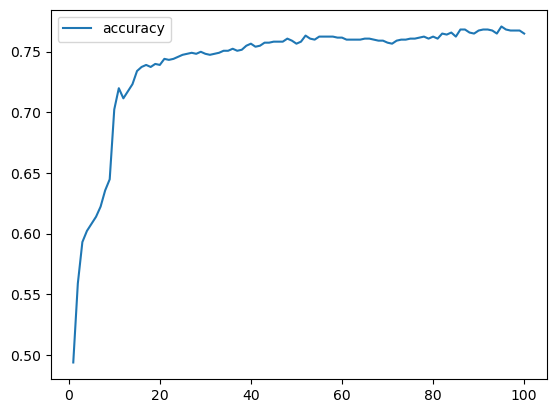

In [32]:
history_df.plot(y="accuracy")

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [27]:
# Set the model's file path
file_path=Path("student_loans.keras")

# Export your model to a keras file
nn_model.save(file_path)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [28]:
# Set the model's file path
file_loaded=Path("student_loans.keras")

# Load the model to a new object
nn_imported = tf.keras.models.load_model(file_loaded)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [29]:
# Make predictions with the test data
predictions = nn_model.predict(X_test_scaled,verbose=2)
predictions

# Display a sample of the predictions


13/13 - 0s - 258ms/epoch - 20ms/step


array([[0.47494727],
       [0.27522185],
       [0.60687244],
       [0.62446713],
       [0.98725194],
       [0.9124297 ],
       [0.9054069 ],
       [0.0610727 ],
       [0.5222108 ],
       [0.34530845],
       [0.9439999 ],
       [0.35564968],
       [0.50220567],
       [0.94409174],
       [0.6940081 ],
       [0.33140633],
       [0.84063566],
       [0.38576666],
       [0.36296323],
       [0.38735625],
       [0.47040862],
       [0.8925196 ],
       [0.32053545],
       [0.9468307 ],
       [0.37530392],
       [0.9418151 ],
       [0.8533576 ],
       [0.52956146],
       [0.16046955],
       [0.22771145],
       [0.43055582],
       [0.96102226],
       [0.21511428],
       [0.93432146],
       [0.19446097],
       [0.59174585],
       [0.27381104],
       [0.32412097],
       [0.9519641 ],
       [0.2625154 ],
       [0.8854681 ],
       [0.05317254],
       [0.05700751],
       [0.9675755 ],
       [0.06502962],
       [0.7415809 ],
       [0.21901605],
       [0.320

In [30]:
predictions_df = pd.DataFrame(columns=["predictions"], data=predictions)
predictions_df["predictions"] = round(predictions_df["predictions"],0)
predictions_df

,predictions
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
395,1.0
396,0.0
397,1.0
398,0.0


In [19]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df = pd.DataFrame(columns=["predictions"], data=predictions)
predictions_df["predictions"] = round(predictions_df["predictions"],0)
predictions_df

,predictions
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
395,1.0
396,0.0
397,1.0
398,0.0


### Step 4: Display a classification report with the y test data and predictions

In [31]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, predictions_df["predictions"].values))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       188
           1       0.79      0.69      0.74       212

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.75      0.74      0.74       400



In [ ]:
#class zero is correct 69% of the time, class one is correct 99% of the time, 188 rows are class zero, and 212 rows are class

---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

To build a recommendation system for student loan options, we would need the following data:
Loan Lender: Information about different lenders and their loan offerings.
Interest Rates: The interest rates associated with various loans. 
Loan Amounts: The range of loan amounts available from different lenders. 
Repayment Periods: Loan repayment duration. 
User Data: age, income, and education level. 
User Location: Geographic location of student and lender, as certain lenders may only operate in specific regions or offer location-based incentives.
Financial History: Information about the borrower's past financial behavior, and creditworthiness 
Credit Score: A key indicator of a borrower's creditworthiness, which lenders use to determine eligibility and interest rates.


2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

the model primarily utilizes collaborative filtering because it will try to predict and classify students based on the assumption that if two users had similar preferences in the past, they are likely to have similar preferences in the future.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

Changing User Needs and Financial Circumstances.
Students' financial situations , housing and educational needs can change rapidly due to various factors, such as changes in income, unexpected expenses, or shifts in academic goals. A recommendation system that does not adapt to these changing circumstances may provide outdated or irrelevant loan options.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**

